In [1]:
import glob
import pandas as pd
import dask
import matplotlib.pyplot as plt
import numpy as np

### Response function analysis

We analyze the response function of BTC/USD as presented in Lecture 8. We also test the presence of stylized facts discussed in Aloud et al. (2012) presented in Lecture 7

In [2]:
#Load data
trade_files=glob.glob("data/raw/trades_bitstamp/*")
trade_files.sort()
allpromises=[pd.read_parquet(fn) for fn in trade_files]
trades=dask.compute(allpromises)[0]
trades=pd.concat(trades)

display(trades.head(5))

mob_files = glob.glob("data/raw/mob/*")
mob_files.sort()
allpromises=[pd.read_parquet(fn) for fn in mob_files]
mob = dask.compute(allpromises)[0]
mob = pd.concat(mob)


['data/raw/trades_bitstamp/0_2021-01-01', 'data/raw/trades_bitstamp/0_2021-01-02', 'data/raw/trades_bitstamp/0_2021-01-03', 'data/raw/trades_bitstamp/0_2021-01-04', 'data/raw/trades_bitstamp/0_2021-01-05', 'data/raw/trades_bitstamp/0_2021-01-06', 'data/raw/trades_bitstamp/0_2021-01-07', 'data/raw/trades_bitstamp/105_2021-04-16', 'data/raw/trades_bitstamp/105_2021-04-17', 'data/raw/trades_bitstamp/105_2021-04-18', 'data/raw/trades_bitstamp/105_2021-04-19', 'data/raw/trades_bitstamp/105_2021-04-20', 'data/raw/trades_bitstamp/105_2021-04-21', 'data/raw/trades_bitstamp/105_2021-04-22', 'data/raw/trades_bitstamp/112_2021-04-23', 'data/raw/trades_bitstamp/112_2021-04-24', 'data/raw/trades_bitstamp/112_2021-04-25', 'data/raw/trades_bitstamp/112_2021-04-26', 'data/raw/trades_bitstamp/112_2021-04-27', 'data/raw/trades_bitstamp/112_2021-04-28', 'data/raw/trades_bitstamp/112_2021-04-29', 'data/raw/trades_bitstamp/119_2021-04-30', 'data/raw/trades_bitstamp/119_2021-05-01', 'data/raw/trades_bitstam

,symbol_id,time_exchange,time_coinapi,uuid,price,size,taker_side
0,BITSTAMP_SPOT_BTC_USD,2021-01-01T00:00:04.8980000Z,2021-01-01T00:00:04.9748720Z,33c7dbae-6b00-4905-ae48-9a85960d33fc,28999.63,0.030000,BUY
1,BITSTAMP_SPOT_BTC_USD,2021-01-01T00:00:04.8980000Z,2021-01-01T00:00:04.9773935Z,77eba94a-2b66-472c-9ff6-38013bb34698,28999.63,0.005913,BUY
2,BITSTAMP_SPOT_BTC_USD,2021-01-01T00:00:11.4710000Z,2021-01-01T00:00:11.5512250Z,8f024f5b-8765-4f34-9def-b8b62a83a14c,28999.14,0.003448,BUY
3,BITSTAMP_SPOT_BTC_USD,2021-01-01T00:00:31.9520000Z,2021-01-01T00:00:32.0253369Z,11ca35c1-b6ab-40c8-a7ac-b31140eef8b7,29002.79,0.547770,BUY
4,BITSTAMP_SPOT_BTC_USD,2021-01-01T00:00:35.0320000Z,2021-01-01T00:00:35.0896292Z,0b4fde8a-16c7-4ee8-8868-5008f69146ba,29015.30,0.001700,BUY


['data/raw/mob/0_2021-01-01']


In [3]:
mob['midprice'] = mob.apply(lambda row : (row['asks'][0]['price'] + row['bids'][0]['price'])/2,axis=1)
events=trades.merge(mob,how="outer",on="time_exchange").sort_values('time_exchange').ffill()

In [4]:
def response_function(tau):
    response = events['s_n']*(events['midprice'] - events['midprice'].shift(tau))
    return response.mean()
events['s_n'] = events.apply(lambda row : +1 if row['taker_side'] == "BUY" else -1,axis=1)


In [ ]:
range_x = np.arange(1000)
response = [response_function(k) for k in range_x]


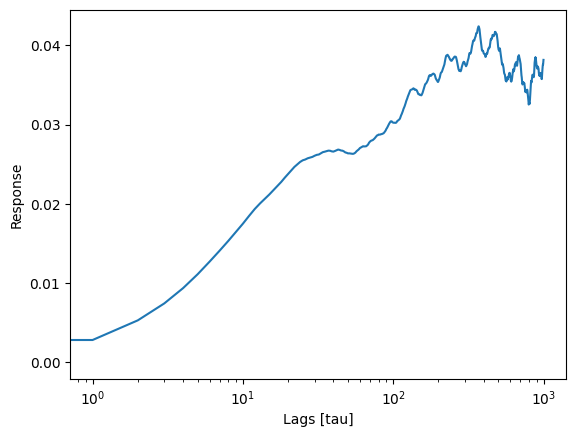

In [6]:
fig, ax = plt.subplots()

ax.set_xlabel("Lags [tau]")
ax.set_ylabel("Response")
ax.set_xscale('log')
ax.plot(range_x, response)
